<a href="https://colab.research.google.com/github/Sivaganesh25/Deep_Learning/blob/main/Fashion_MNIST_Dataset_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist=keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

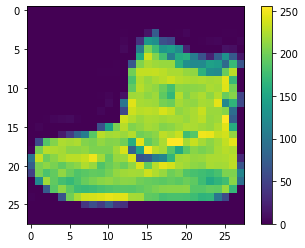

In [ ]:
# preprocessing data , index of 0 ,1 st picture ,in the range of 0 to 255
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# scaling the pixel values to use in the neural networks ,by dividing it by 255
train_images=train_images/255.0
test_images=test_images/255.0

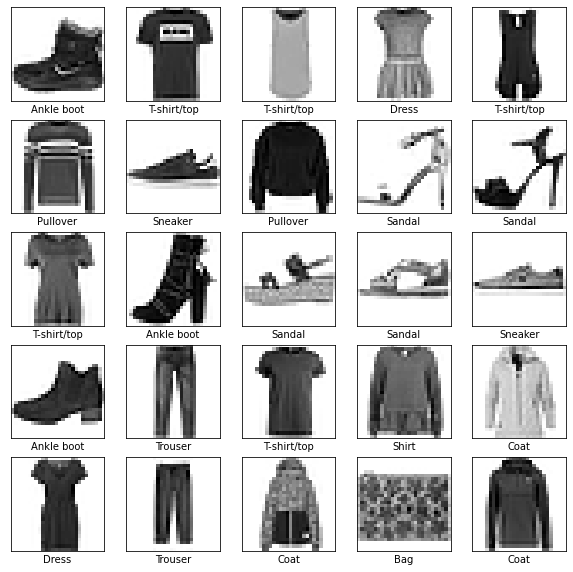

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show() 

In [ ]:
# model building,1st we need to configure the model layers and then move forward with compiling the model
# setting up layers
model=keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.Dense(128,activation='relu'),
                        keras.layers.Dense(10)])

In [ ]:
# compiling the model
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])


In [ ]:
# training neural network for Image classification with tensor flow
model.fit(train_images,train_labels,epochs=10)

# Evaluating accuracy
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)
print('\nTest accuracy:',test_acc)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4950 - accuracy: 0.8265
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3721 - accuracy: 0.8655
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3351 - accuracy: 0.8774
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3095 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2923 - accuracy: 0.8917
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2784 - accuracy: 0.8960
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2655 - accuracy: 0.9009
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2540 - accuracy: 0.9054
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2459 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.235

In [ ]:
# A prediction is an array of 10 numbers. They represent the “confidence” of the model that the image matches each of the 10 different garments.
# Let’s see which label has the highest confidence value:

probability_model=tf.keras.Sequential([model,tf.keras.layers.Softmax()])
predictions=probability_model.predict(test_images)
predictions[0]

array([3.3341444e-06, 5.9527167e-10, 7.2076389e-10, 4.1249718e-13,
       1.4660352e-08, 4.3248851e-03, 1.2081729e-07, 2.8538390e-03,
       5.5911943e-07, 9.9281728e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

In [ ]:
# helper functions to plot our predictions
def plot_image(i,predictions_array,true_label,img):
  true_label,img=true_label[i],img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img,cmap=plt.cm.binary)

  predicted_label=np.argmax(predictions_array)

  if predicted_label==true_label:
    color='blue'
  else:
    color='red'

  plt.xlabel("{}{:2.0f}%({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [ ]:
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

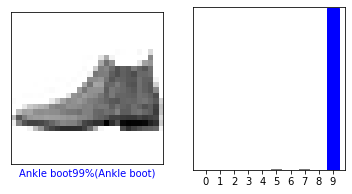

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

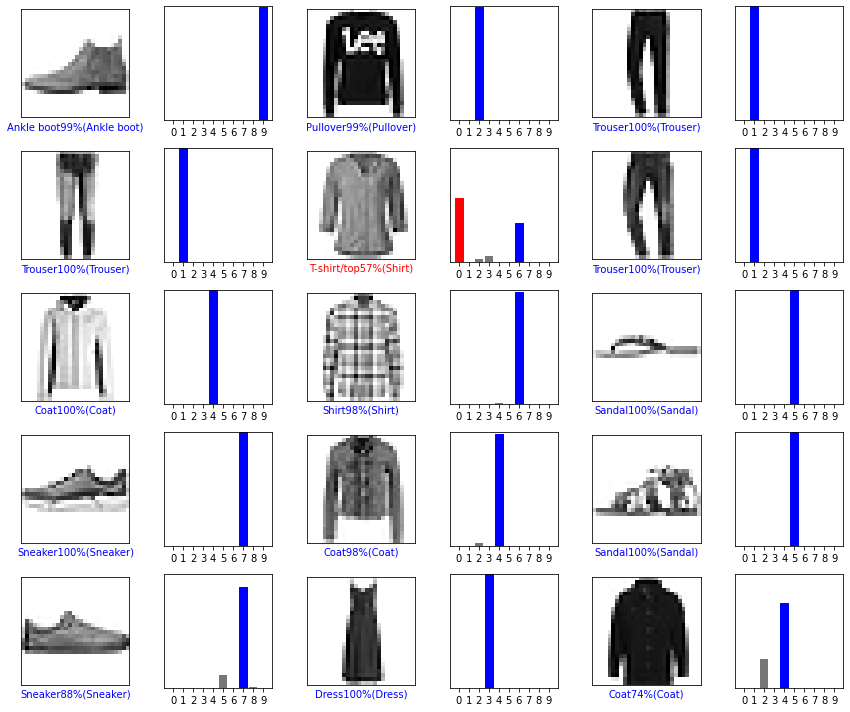

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()